<a href="https://colab.research.google.com/github/nh0875/Desafios-Procesamiento-del-Habla-974/blob/main/Copy_of_Desaf%C3%ADo_Final_Procesamiento_del_Habla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Obligatorio Procesamiento del Habla**
**Juan Ignacio Hilliard Bochaca 4162974**

**Tema 5 (Análisis de Sentimiento del Texto)**

In [ ]:
import pdfplumber
import re
from transformers import BertTokenizer, pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el modelo y el tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
sentiment_model = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Función para filtrar números romanos y títulos de página
def filtrar_texto(texto):
    texto_filtrado = re.sub(r'\b[I|V|X|L|C|D|M]+\b', '', texto)
    texto_filtrado = re.sub(r'\b(Página|Capítulo)\s?\d+\b', '', texto_filtrado)
    return texto_filtrado

# Función para dividir el texto en estrofas con 6 versos cada una, excepto la última que puede tener 8
def obtener_estrofas(texto):
    lineas = [linea.strip() for linea in texto.split("\n") if linea.strip()]
    estrofas = []
    i = 0
    total_lineas = len(lineas)

    while i < total_lineas:
        if total_lineas - i == 8:
            estrofa = "\n".join(lineas[i:i + 8])
            estrofas.append(estrofa)
            i += 8
        else:
            estrofa = "\n".join(lineas[i:i + 6])
            estrofas.append(estrofa)
            i += 6
    return estrofas

# Cargar el PDF y procesarlo
with pdfplumber.open("/content/hernandez_jose_-_el_gaucho_martin_fierro.pdf") as pdf:
    text = ""
    for page_num in range(3, len(pdf.pages)):
        page = pdf.pages[page_num]
        page_text = page.extract_text()
        if page_text:
            text += page_text + "\n"

# Filtrar el texto
text = filtrar_texto(text)

# Obtener las estrofas
estrofas = obtener_estrofas(text)

# Clasificar sentimiento en cada estrofa
results = []
sentiment_counts = {"Positivo": 0, "Neutral": 0, "Negativo": 0}

for estrofa in estrofas:
    result = sentiment_model(estrofa)
    label = result[0]['label']
    if label in ['1 star', '2 stars']:
        sentimiento = 'Negativo'
    elif label == '3 stars':
        sentimiento = 'Neutral'
    else:
        sentimiento = 'Positivo'

    results.append({"estrofa": estrofa, "sentimiento": sentimiento})
    sentiment_counts[sentimiento] += 1
    print(f"Estrofa: {estrofa}\nSentimiento: {sentimiento}\n")


Estrofa: El Gaucho Martín Fierro
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
Sentimiento: Negativo

Estrofa: con el cantar se consuela.
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
Sentimiento: Positivo

Estrofa: y aclaren mi entendimiento.
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
Sentimiento: Positivo

Estrofa: en una ocasión tan ruda.
Yo he visto muchos cantores,
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar:
parece que sin largar
Sentimiento: Negativo

Estrofa: se cansaron en partidas.
Mas ande otro criollo pasa
Martín Fierro ha de pasar;
nada lo hace recular,
ni las fantasmas lo espantan,
y dende que todos cantan
Sentimiento: Negativo

Estrofa: yo también quiero cantar.
Cantando me he de morir,
can

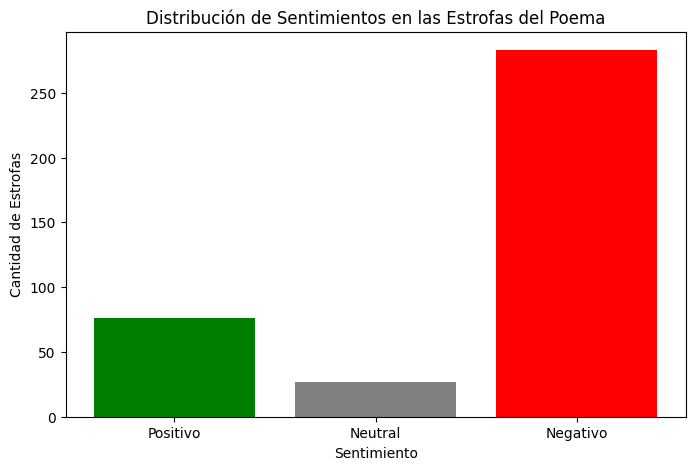

In [ ]:
# Grafico para vizualizar la cantidad de Estrofas de cada grupo de sentimientos / La cantidad de estrofas totales
labels = list(sentiment_counts.keys())
values = list(sentiment_counts.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'gray', 'red'])
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Estrofas")
plt.title("Distribución de Sentimientos en las Estrofas del Poema")
plt.show()